In [28]:
# Pandas kütüphanesini veri işleme ve analiz için içe aktarır
import pandas as pd

# Matplotlib kütüphanesinden pyplot modülünü grafik çizimi için içe aktarır
import matplotlib.pyplot as plt

# Seaborn kütüphanesini istatistiksel veri görselleştirmeleri için içe aktarır
import seaborn as sns


In [29]:
# Veri setini eğitim ve test olarak ayırmak için gerekli fonksiyonu içe aktarır
from sklearn.model_selection import train_test_split

# Model doğruluğunu değerlendirmek için doğruluk skoru, karışıklık matrisi ve sınıflandırma raporu fonksiyonlarını içe aktarır
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Karar ağacı sınıflandırıcısı ve karar ağacı görselleştirme fonksiyonunu içe aktarır
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Kategorik verileri sayısal forma çevirmek için etiket kodlayıcıyı içe aktarır
from sklearn.preprocessing import LabelEncoder

# Uyarı mesajlarını görmezden gelmek için warnings modülünü kullanır
import warnings
warnings.filterwarnings("ignore")


In [34]:
# Google Colab ortamında bilgisayardan dosya yüklemek için gerekli modülü içe aktarır
from google.colab import files

# Kullanıcıdan dosya seçip yüklemesini sağlar, yüklenen dosyalar 'uploaded' değişkenine kaydedilir
uploaded = files.upload()


Saving kidney_disease.csv to kidney_disease (2).csv


In [35]:
# Pandas kütüphanesini veri işleme için içe aktarır
import pandas as pd

# "kidney_disease.csv" dosyasını pandas DataFrame olarak yükler
df = pd.read_csv("kidney_disease.csv")


In [36]:


# 'id' sütununu veri setinden kaldırır (özellik olarak kullanılmayacak)
df.drop("id", axis=1, inplace=True)

# Veri setindeki sütun isimlerini anlamlı ve okunabilir isimlerle değiştirir
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
              'red_blood_cells', 'pus_cell', 'pus_cell_clumbs',
              'bacteria', 'blood_glucose_random', 'blood_urea',
              'serum_crearinine', 'sodium', 'potassium', 'hemoglobin',
              'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
              'appetite', 'peda_edema', 'aanemia', 'class']

# Veri setinin temel bilgi özetini yazdırır (veri tipleri, eksik değerler gibi)
df.info()

# Sayısal sütunların istatistiksel özetini çıkarır (ortalama, medyan, std vb.)
describe = df.describe()

# 'packed_cell_volume' sütunundaki verileri sayısal tipe dönüştürür, dönüştürülemeyenleri NaN yapar
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"], errors="coerce")

# 'white_blood_cell_count' sütunundaki verileri sayısal tipe dönüştürür, dönüştürülemeyenleri NaN yapar
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"], errors="coerce")

# 'red_blood_cell_count' sütunundaki verileri sayısal tipe dönüştürür, dönüştürülemeyenleri NaN yapar
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"], errors="coerce")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_crearinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
hypertension: ['yes' 'no' nan]
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease: ['no' 'yes' '\tno' nan]
appetite: ['good' 'poor' nan]
peda_edema: ['no' 'yes' nan]
aanemia: ['no' 'yes' nan]
class: ['ckd' 'ckd\t' 'notckd']


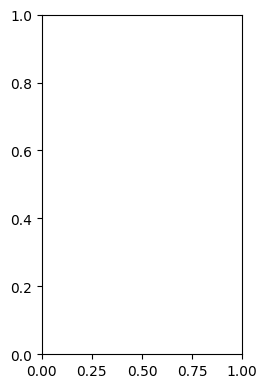

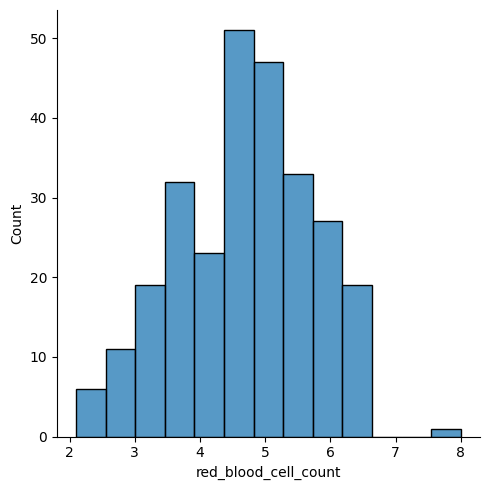

In [37]:
# Kategorik (object tipindeki) sütun isimlerini listeye alır
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

# Sayısal (object olmayan tipteki) sütun isimlerini listeye alır
num_cols = [col for col in df.columns if df[col].dtype != "object"]

# Her kategorik sütundaki benzersiz (unique) değerleri yazdırır
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

# 'diabetes_mellitus' sütunundaki bazı hatalı girilmiş (başında tab karakteri olan) değerleri temizler
df["diabetes_mellitus"].replace(to_replace={'\tno': "no", '\tyes': "yes", 'yes': "yes"}, inplace=True)

# 'coronary_artery_disease' sütunundaki benzer şekilde hatalı olan '\tno' değerini düzeltir
df["coronary_artery_disease"].replace(to_replace={'\tno': "no"}, inplace=True)

# 'class' sütunundaki 'ckd\t' gibi fazladan tab karakter içeren değeri düzeltir
df["class"].replace(to_replace={'ckd\t': "ckd"}, inplace=True)

# 'class' sütunundaki hastalık durumlarını sayısal hale getirir (ckd=0, notckd=1)
df["class"] = df["class"].map({"ckd": 0, "notckd": 1})

# Grafik boyutunu ayarlar
plt.figure(figsize=(15,15))
plotnumber = 1

# Sayısal sütunlar için dağılım grafiği çizdirir (14. sütundan sonrası için)
for col in num_cols:
    if plotnumber >= 14:
        # 3 satır 5 sütunluk grafik alanından uygun yeri seçer
        ax = plt.subplot(3, 5, plotnumber)
        # Seaborn ile sütun verisinin dağılım grafiğini oluşturur
        sns.displot(df[col])
        plt.xlabel(col)
    plotnumber += 1

# Grafiklerin düzenli görünmesi için boşlukları ayarlar
plt.tight_layout()
# Grafik penceresini gösterir
plt.show()



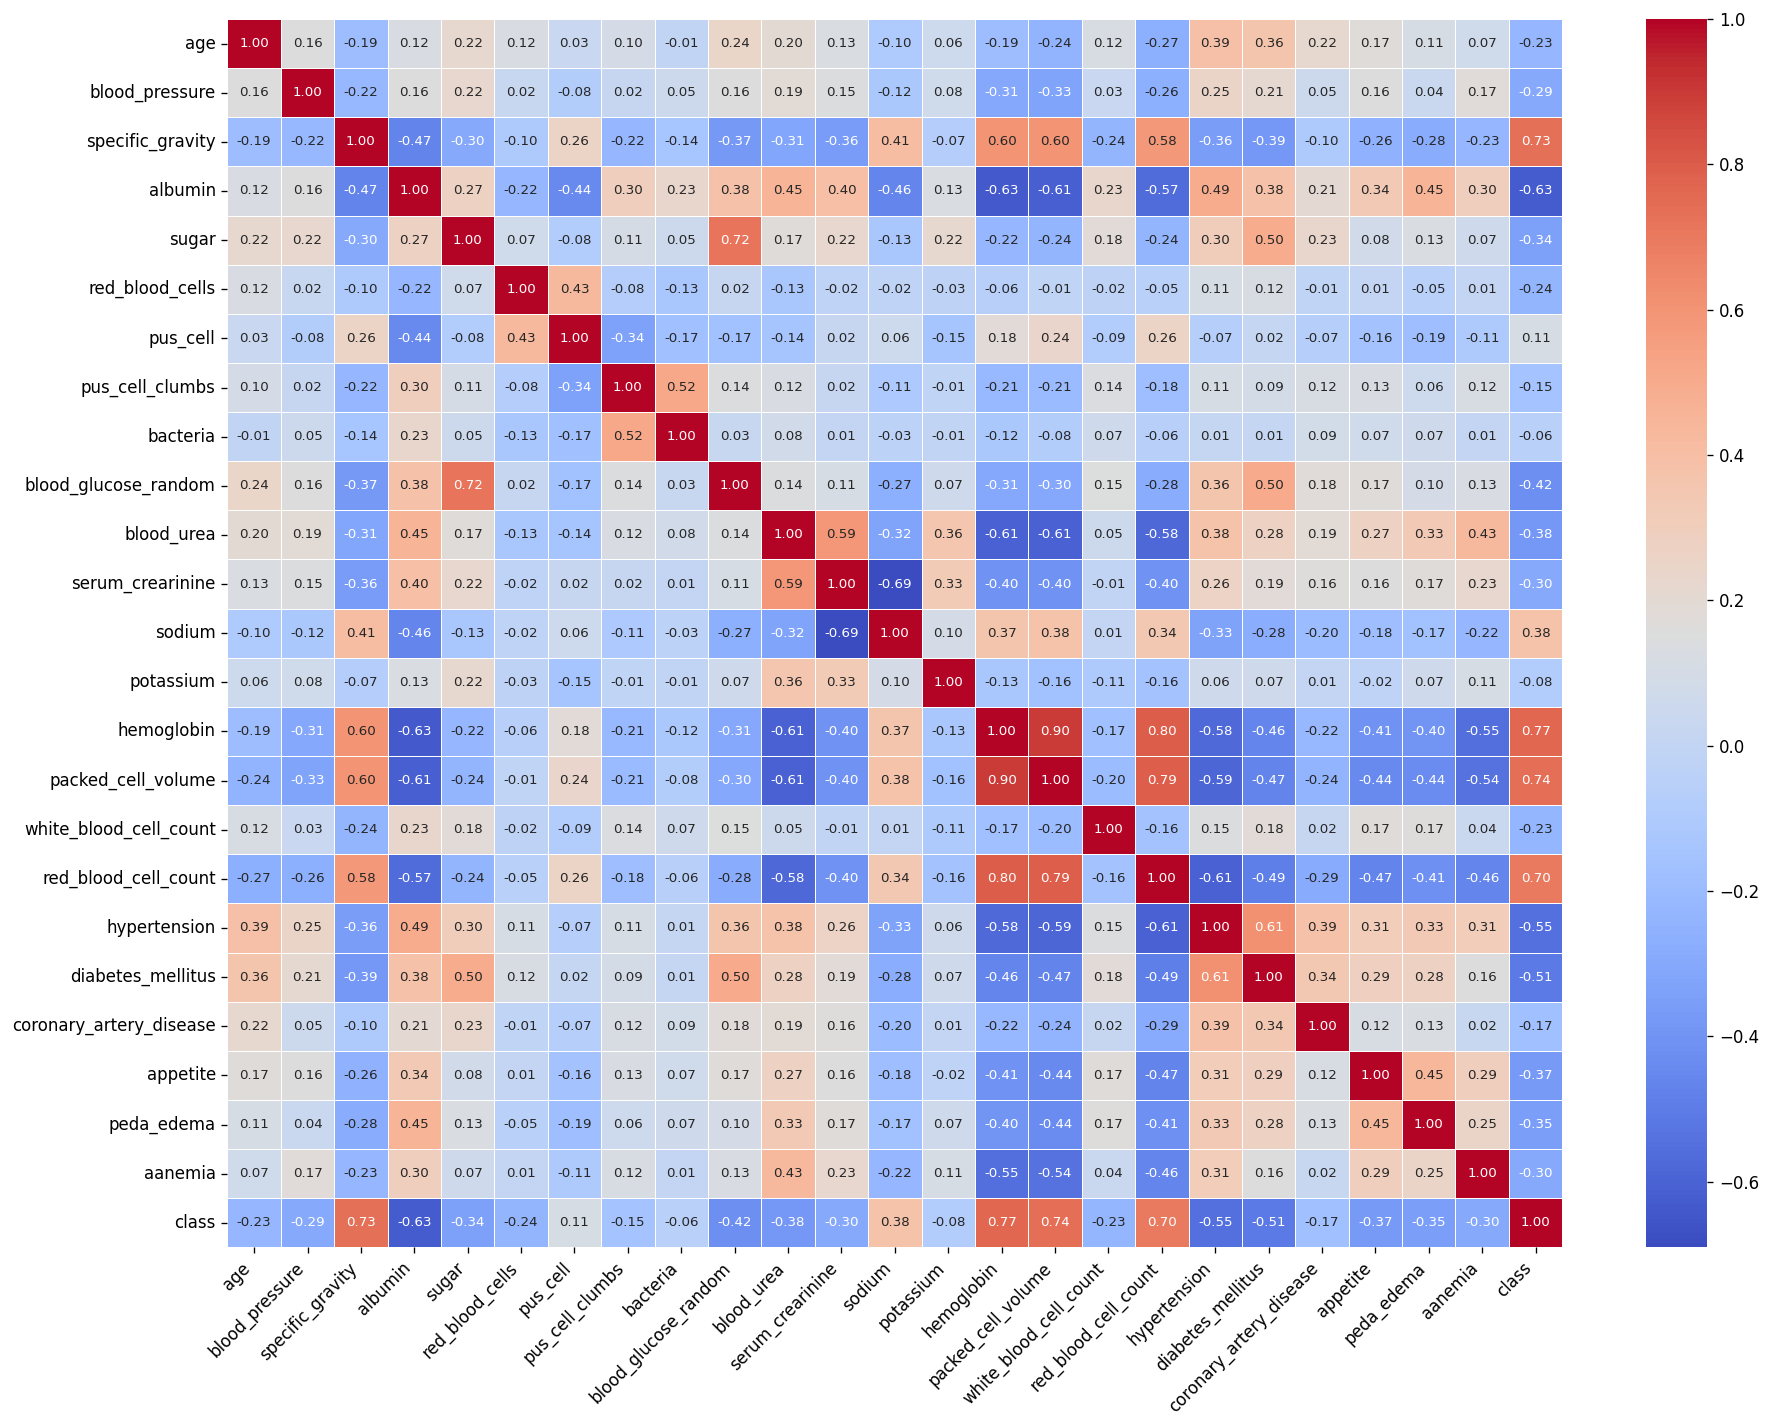

In [38]:
# Grafik çizimi için matplotlib.pyplot ve seaborn kütüphanelerini içe aktarır
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorik verileri sayısala çevirmek için LabelEncoder sınıfını içe aktarır
from sklearn.preprocessing import LabelEncoder

# Orijinal veri setini korumak için bir kopyasını oluşturur
df_encoded = df.copy()

# LabelEncoder örneği oluşturur
label_encoder = LabelEncoder()

# Veri setindeki kategorik (object tipindeki) sütunları döngü ile sayısal hale çevirir
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Grafik boyutunu ve çözünürlüğünü ayarlar (dpi arttırıldı, daha net görüntü için)
plt.figure(figsize=(16, 12), dpi=120)

# Sayısal veriler arasındaki korelasyon matrisini ısı haritası şeklinde görselleştirir
sns.heatmap(df_encoded.corr(),
            annot=True,           # Hücrelerin içine korelasyon değerlerini yazar
            fmt=".2f",            # Korelasyon değerleri ondalık 2 basamak gösterilir
            cmap="coolwarm",      # Renk paleti seçilir
            linecolor="white",    # Hücreler arası çizgi rengi
            linewidths=0.5,       # Hücreler arası çizgi kalınlığı
            annot_kws={"size": 8} # Korelasyon sayıların yazı boyutu

           )

# X ekseni etiketlerini 45 derece sağa döndürür, hizalar ve yazı büyüklüğünü ayarlar
plt.xticks(rotation=45, ha="right", fontsize=10)

# Y ekseni yazı boyutunu ayarlar
plt.yticks(fontsize=10)

# Grafik etiketlerinin taşmasını engeller, düzenli görünmesini sağlar
plt.tight_layout()

# Grafiği ekranda gösterir
plt.show()


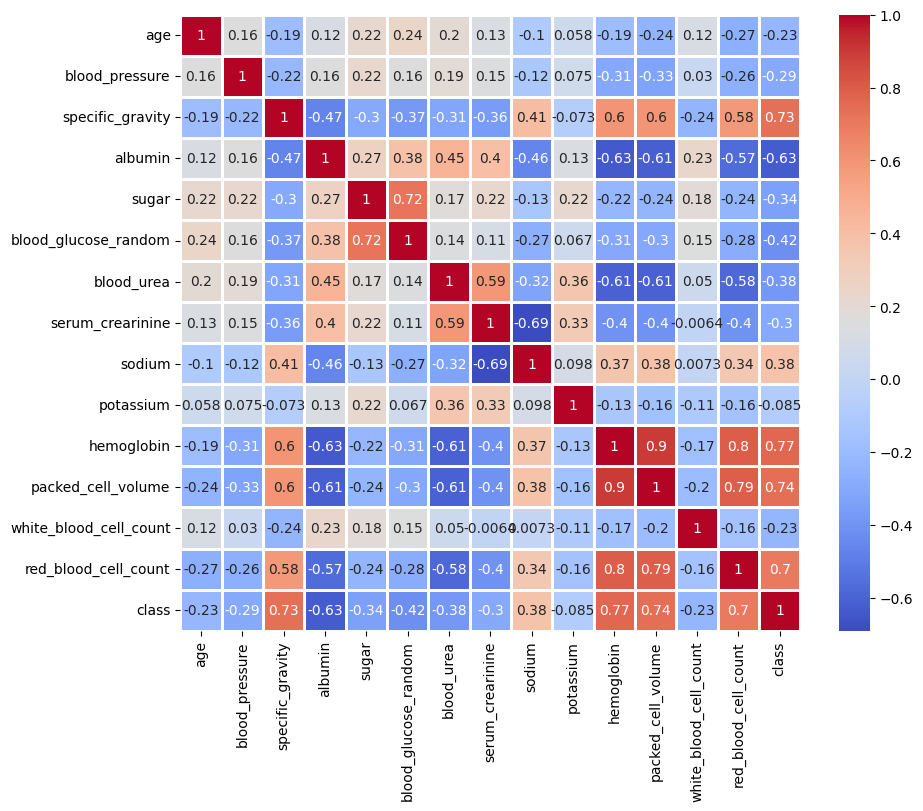

In [39]:
# Grafik boyutunu 10x8 inç olarak ayarlar
plt.figure(figsize=(10, 8))

# Sayısal sütunların korelasyon matrisini hesaplar ve seaborn ile ısı haritası olarak çizer
sns.heatmap(
    df.select_dtypes(include=['number']).corr(),  # Sayısal sütunların korelasyonu
    annot=True,                                  # Hücrelerin içine korelasyon değerlerini yazar
    linecolor="white",                           # Hücreler arası çizgi rengi beyaz
    linewidths=2,                               # Hücreler arası çizgi kalınlığı
    cmap="coolwarm"                             # Renk paleti (soğuk-sıcak renk geçişi)
)

# Grafiği ekranda gösterir
plt.show()



In [ ]:
print(df.columns)  # DataFrame sütunlarını yazdır


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumbs', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_crearinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class', ' packed_cell_volume',
       ' white_blood_cell_count', ' red_blood_cell_count'],
      dtype='object')


In [ ]:
df.dropna(subset=["class"], inplace=True)  # Doğru sütun adı kullanıldı
df["class"] = df["class"].astype(str)  # class yerine classification sütunu kullanıldı


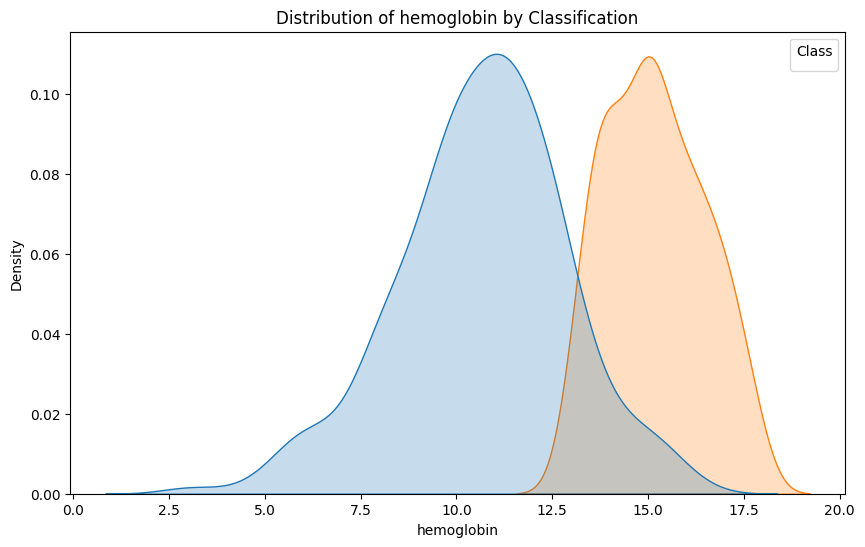

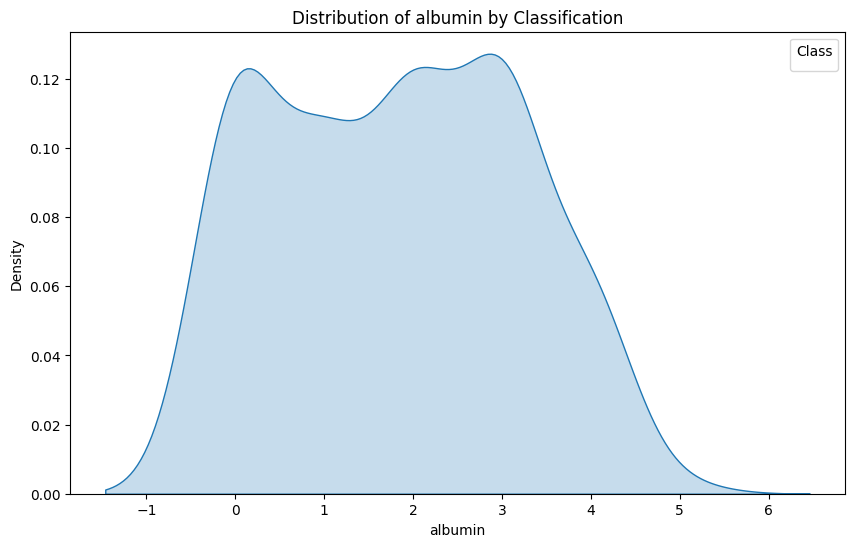

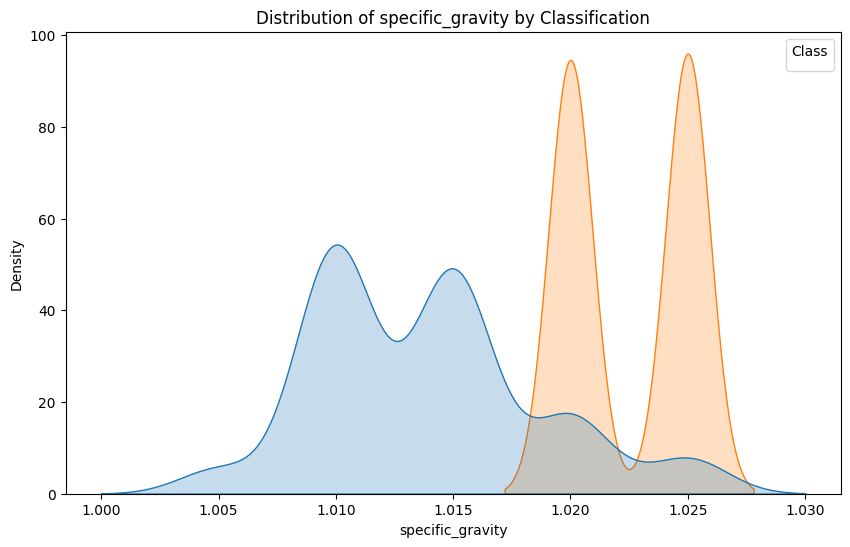

In [40]:
def kde(col):
    # Veride belirtilen sütun ve 'class' sütunundaki eksik (NaN) değerleri temizler
    df.dropna(subset=[col, "class"], inplace=True)

    # Grafik boyutunu ayarlar (genişlik=10, yükseklik=6 inç)
    plt.figure(figsize=(10, 6))

    # Seaborn ile KDE (Kernel Density Estimate) grafiği çizer
    # 'col' değişkeninin dağılımını 'class' değişkenine göre renklendirir ve doldurur
    sns.kdeplot(data=df, x=col, hue="class", fill=True)

    # Grafik için açıklayıcı bir lejant (etiket) ekler, başlığı "Class" olur
    plt.legend(title="Class")

    # X ekseni etiketi olarak 'col' sütun adını yazar
    plt.xlabel(col)

    # Grafiğe başlık ekler, dinamik olarak sütun adını içerir
    plt.title(f"Distribution of {col} by Classification")

    # Grafiği gösterir
    plt.show()

# Fonksiyonu örnek olarak 'hemoglobin', 'albumin' ve 'specific_gravity' sütunları için çağırır
kde("hemoglobin")
kde("albumin")
kde("specific_gravity")





In [41]:
# Veri setindeki tüm sütun isimlerini yazdırır
print(df.columns)

# Her sütundaki eksik (NaN) değer sayısını hesaplar ve azalan şekilde sıralar
df.isna().sum().sort_values(ascending=False)

# Eksik sayısal değerleri, o sütundaki dolu değerlerden rastgele örneklerle dolduran fonksiyon
def solve_mv_random_value(feature):
    # Eksik olmayan değerlerden, eksik değer sayısı kadar rastgele örnek alır
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    # Bu rastgele örneklerin indekslerini, eksik değerlerin indeksleriyle eşleştirir
    random_sample.index = df[df[feature].isnull()].index
    # Eksik değerlerin yerine bu rastgele örnekleri atar
    df.loc[df[feature].isnull(), feature] = random_sample

# Sayısal sütunlar için yukarıdaki eksik doldurma fonksiyonunu uygular
for col in num_cols:
    solve_mv_random_value(col)

# Sayısal sütunlarda eksik değer kalıp kalmadığını kontrol eder
df[num_cols].isnull().sum()

# Kategorik sütunlarda eksik değerleri en sık görülen (mod) değerle dolduran fonksiyon
def solve_mv_mode(feature):
    mode = df[feature].mode()[0]   # En sık değer
    df[feature] = df[feature].fillna(mode)

# Eksik değerleri rastgele doldurma fonksiyonunu kategorik sütunlardan bazılarına uygular
solve_mv_random_value("red_blood_cells")
solve_mv_random_value("pus_cell")

# Kategorik sütunlarda eksik değerleri mod ile doldurur
for col in cat_cols:
    solve_mv_mode(col)

# Kategorik sütunlarda eksik değerlerin tamamlandığını doğrular
df[cat_cols].isnull().sum()

# Kategorik sütunların her birindeki benzersiz (unique) değer sayısını yazdırır
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}")

# LabelEncoder sınıfından nesne oluşturur
encoder = LabelEncoder()

# Kategorik sütunlardaki metinsel değerleri sayısal etiketlere dönüştürür
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumbs', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_crearinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')
red_blood_cells: 2
pus_cell: 2
pus_cell_clumbs: 2
bacteria: 2
hypertension: 2
diabetes_mellitus: 2
coronary_artery_disease: 2
appetite: 2
peda_edema: 2
aanemia: 2
class: 2


In [42]:
# Bağımsız değişkenleri (target olmayan sütunlar) liste olarak alır
independent_col = [col for col in df.columns if col != "class"]

# Bağımlı değişken olarak 'class' sütununu seçer
dependent_col = "class"

# Bağımsız değişkenleri X değişkenine atar
X = df[independent_col]

# Bağımlı değişkeni y değişkenine atar
y = df[dependent_col]

# Veriyi eğitim ve test olarak %70-%30 oranında böler, random_state ile sonucu sabitler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırıcısı oluşturur, maksimum derinliği 2 olarak ayarlar
dtc = DecisionTreeClassifier(max_depth=2)

# Modeli eğitim verisiyle eğitir
dtc.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapar
y_pred = dtc.predict(X_test)

# Modelin doğruluk skorunu hesaplar
dtc_acc = accuracy_score(y_test, y_pred)

# Tahmin sonuçlarıyla karmaşıklık matrisi oluşturur
cm = confusion_matrix(y_test, y_pred)

# Sınıflandırma raporu (precision, recall, f1-score vb.) üretir
cr = classification_report(y_test, y_pred)

# Sonuçları yazdırır
print("Confusion matrix:", cm)
print("classification_report:", cr)



Confusion matrix: [[54  1]
 [ 0 39]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.97      1.00      0.99        39

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



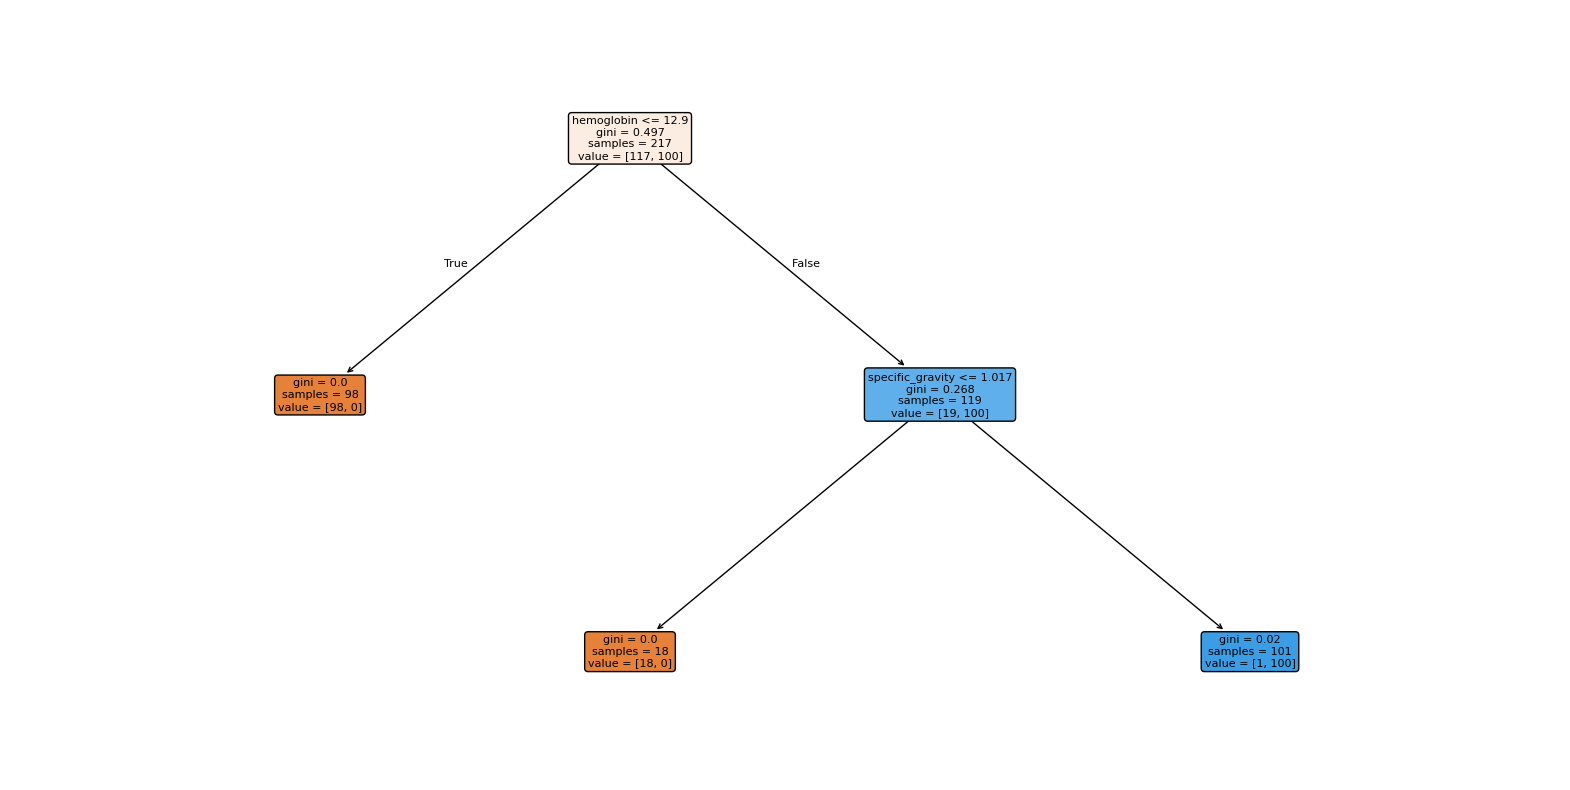

In [43]:
# Sınıf isimlerini tanımlar (grafikte kullanmak için)
class_names = ["ckd", "notckd"]

# Grafik boyutunu ayarlar (genişlik=20, yükseklik=10 inç)
plt.figure(figsize=(20, 10))

# Karar ağacını görselleştirir
# feature_names parametresi, düğümlerde özellik isimlerini gösterir
# filled=True, düğümlerin sınıfa göre renklendirilmesini sağlar
# rounded=True, düğüm kenarlarını yuvarlatır
# fontsize=8, metinlerin boyutunu ayarlar
plot_tree(dtc, feature_names=independent_col, filled=True, rounded=True, fontsize=8)

# Grafiği ekranda gösterir
plt.show()


Most important feature: Feature       hemoglobin
Importance      0.717039
Name: 14, dtype: object


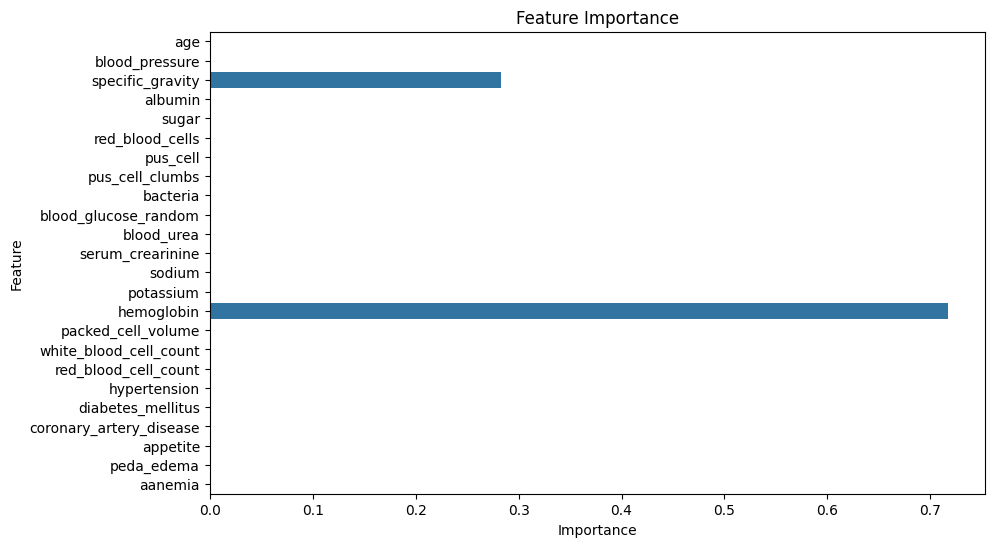

In [44]:

# Özellik önemlerini hesaplayıp DataFrame olarak saklar
feature_importance = pd.DataFrame({
    "Feature": independent_col,              # Bağımsız değişkenlerin isimleri
    "Importance": dtc.feature_importances_  # Modelin hesapladığı her özelliğin önemi (sondaki 's' önemli!)
})

# Önemi en yüksek olan özelliği sıralayıp yazdırır
print("Most important feature:", feature_importance.sort_values(by="Importance", ascending=False).iloc[0])

# Özellik önemlerini görselleştirmek için grafik boyutunu ayarlar
plt.figure(figsize=(10, 6))

# Seaborn barplot ile özelliklerin önem değerlerini yatay çubuk grafik olarak çizer
sns.barplot(x="Importance", y="Feature", data=feature_importance)

# Grafik başlığı ekler
plt.title("Feature Importance")

# Grafiği gösterir
plt.show()
